# DATASET [Boston Housing](https://keras.io/api/datasets/boston_housing/)


57026/57026 [==============================] - 0s 0us/step


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
21/21 [==============================] - 7s 28ms/step - loss: 516.1021 - mae: 20.7785 - val_loss: 528.7361 - val_mae: 21.2152
Epoch 2/10
21/21 [==============================] - 0s 16ms/step - loss: 425.8876 - mae: 18.6893 - val_loss: 421.6881 - val_mae: 18.7238
Epoch 3/10
21/21 [==============================] - 0s 15ms/step - loss: 333.2983 - mae: 16.0032 - val_loss: 296.3737 - val_mae: 15.3620
Epoch 4/10
21/21 [==============================] - 0s 14ms/step - loss: 217.7476 - mae: 12.4707 - val_loss: 178.2752 - val_mae: 11.2462
Epoch 5/10
21/21 [==============================] - 0s 16ms/step - loss: 131.5219 - mae: 9.2860 - val_loss: 100.5284 - val_mae: 7.6745
Epoch 6/10
21/21 [==============================] - 0s 21ms/step - loss: 95.2304 - mae: 7.4544 - val_loss: 65.3343 - val_mae: 5.9350
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 78.9011 - mae: 6.8382 - val_loss: 49.8143 - val_mae: 5.1700
Epoch 8/10
21/21 [==============================] -

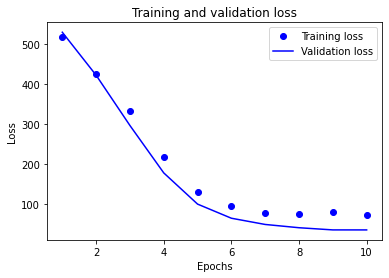

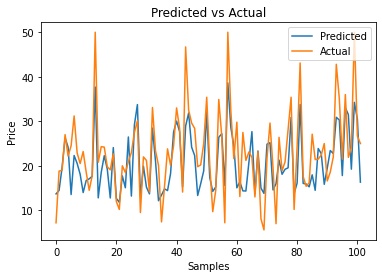

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalizacja danych
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Model CNN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Kompilacja i trenowanie
model.compile(optimizer=RMSprop(lr=0.001), loss='mse', metrics=['mae'])
history = model.fit(train_data, train_targets, epochs=10, batch_size=16, validation_split=0.2)

#Ewaluacja modelu
test_loss, test_mae = model.evaluate(test_data, test_targets)

# Dokonujemy predykcji na danych testowych
predictions = model.predict(test_data)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Predykcja
plt.plot(predictions, label='Predicted')
plt.plot(test_targets, label='Actual')
plt.title('Predicted vs Actual')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()
